In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors 
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline


def my_minmax_scaler(df, min_val, max_val):
    #Take in a dataframe and return a dataframe scaled with min 0, max 1
    print('------Scaling Data to Min {}, Max {}------\n'.format(min_val,max_val))
    # Save the column names.
    names=df.columns
    
    #instatiate scaler object
    #you can use StandardScaler instead to scale with mean 0 and std 1
    scaler = MinMaxScaler(feature_range=(min_val,max_val), copy=True)
    
    # Scale, then turn the resulting numpy array back into a data frame with the
    # correct column names.
    scaler.fit(df)
    df_scaled = pd.DataFrame(scaler.transform(df), columns=names)
    
    return df_scaled


def my_create_linear_regr(X,Y):
    
    #takes X, Y and returns fitted regression model
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    # Run model a second way using StatsModel to get the P-Values of each parameter
    my_run_linear_regression(X,Y)
    print('R-Squared: {}'.format(regr.score(X, Y)))

    # Inspect the results.
    print('---- Regression Results ----')
    print([feature_list])
    print('\nCoefficients: \n', regr.coef_)
    print('\nIntercept: \n', regr.intercept_)
    print('\nR-squared:')
    print(regr.score(X, Y))
    return regr






def my_get_feature_p_values(df, feature_list, y_var):
    
    # Write out the model formula.
    # Your dependent variable on the right, independent variables on the left
    # Use a ~ to represent an '=' from the functional form
    #linear_formula = 'y_var ~ TV+Radio+Newspaper'
    
    last_feature = len(feature_list) - 1
    linear_formula = y_var + ' ~ '
    i = 0
    for feature in feature_list:
        if i == last_feature:
            linear_formula = linear_formula + feature_list[i]
        else:
            linear_formula = linear_formula + feature_list[i] + '+'

        i=i+1
    print(linear_formula + '\n')

    # Fit the model to our data using the formula.
    lm = smf.ols(formula=linear_formula, data=df).fit()
    
    #Load results into a df to display
    results_df = pd.DataFrame({'Parameter': lm.params, 
                     'P-Value' : lm.pvalues})
    
    
    print(results_df)
    print('')
    print('R-Squared: ' + str(lm.rsquared))    
    return lm

#plotting loop    
def my_plot_loop(X,y):
    
    #takes an X feature set (df or array)
    #takes a y expected outcome set (series, list, or array)
    #plots all features (histogram, boxplot, and scatter against y
    
    list_features = X.columns
    listlength = len(list_features)+1
    f, axes = plt.subplots(listlength, 3, sharey=False, sharex=False , figsize=(20,40))
    y_var = y.name
    
 

    i = 1
    for column in list_features:
        plt.subplot(listlength, 3, i)
        #sns.scatterplot(X[column],y, x_jitter=.5, y_jitter=.5 )
        sns.kdeplot(X[column],y, cmap="Reds", shade=True, shade_lowest=False)
        sns.despine()
        
        plt.subplot(listlength, 3, i+1)
        sns.boxplot(X[column] )

        plt.subplot(listlength, 3, i+2)
        #plt.title(column)
        plt.xlabel(column)
        plt.hist(X[column], bins="auto")
        i = i + 3

    #Plot Y Variable
    plt.subplot(listlength, 3, i)
    sns.scatterplot(y,y)

    plt.subplot(listlength, 3, i+1)
    sns.boxplot(y )

    plt.subplot(listlength, 3, i+2)
    #plt.title(column)
    plt.xlabel(y_var)
    plt.hist(y, bins="auto")
    return None


def my_minmax_scaler(df, min_val, max_val):
    #Take in a dataframe and return a dataframe scaled with min 0, max 1
    print('------Scaling Data to Min {}, Max {}------\n'.format(min_val,max_val))
    # Save the column names.
    names=df.columns
    
    #instatiate scaler object
    #you can use StandardScaler instead to scale with mean 0 and std 1
    scaler = MinMaxScaler(feature_range=(min_val,max_val), copy=True)
    
    # Scale, then turn the resulting numpy array back into a data frame with the
    # correct column names.
    scaler.fit(df)
    df_scaled = pd.DataFrame(scaler.transform(df), columns=names)
    
    return df_scaled


#Check for assumption: multivariate normality
def my_explore_residuals(predicted_y, actual_y):
    fig = plt.figure(figsize=(10,3))

    # Calculate the error, also called the residual.
    residual = actual_y - predicted_y

    fig.add_subplot(121)
    plt.hist(residual)
    plt.title('Residual counts')
    plt.xlabel('Residual')
    plt.ylabel('Count')

    fig.add_subplot(122)
    plt.scatter(predicted_y, residual)
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.axhline(y=0)
    plt.title('Residual vs. Predicted')

    plt.show()


In [2]:
survey = pd.DataFrame()

#http://www.pewinternet.org/dataset/jan-3-10-2018-core-trends-survey/
survey = pd.read_csv('January 3-10, 2018 - Core Trends Survey - CSV.csv')

survey.columns

#survey.describe().transpose()
survey = survey[['sex','age','marital','inc','hisp',
          'sns2a','sns2b','sns2c','sns2d','sns2e','pial5d']]

survey.columns = ['sex','age','marital','income','hisp',
          'twitter','instagram','facebook','snapchat','youtube','attachment_to_social_media']

#--- Data Cleaning -------
#survey = survey[survey.attachment_to_social_media.isin([' ','8','9']) == False]
survey.attachment_to_social_media = survey.attachment_to_social_media.str.replace('5','1')
survey.attachment_to_social_media = np.where(survey.attachment_to_social_media.isin([' ','8','9','6']),'5',
                                       survey.attachment_to_social_media)

#reverse target (currently 1-4 1 is difficult)
survey.attachment_to_social_media = 5 - survey.attachment_to_social_media.astype('int64')

#Replace Age and Income NA with median
survey.age = survey.age.replace(99,survey.age.median())
survey.income = survey.income.replace(99,survey.income.median())
survey.income = survey.income.replace(98,survey.income.median())

#Classify Married, Not Married
survey.marital = np.where(survey.marital == 1, 1, 0)
survey.rename(columns={'marital' : 'married'}, inplace=True)

#for each social media, classify 8,9,blank into a new category called 6
survey.twitter = np.where(survey.twitter.isin([' ','8','9']),'6',survey.twitter)
survey.instagram = np.where(survey.instagram.isin([' ','8','9']),'6',survey.instagram)
survey.facebook = np.where(survey.facebook.isin([' ','8','9']),'6',survey.facebook)
survey.snapchat = np.where(survey.snapchat.isin([' ','8','9']),'6',survey.snapchat)
survey.youtube = np.where(survey.youtube.isin([' ','8','9']),'6',survey.youtube)

#reverse social media usage (currently 1-6 where 1 is often)
survey.twitter = 6 - survey.twitter.astype('int64')
survey.instagram = 6 - survey.instagram.astype('int64')
survey.facebook = 6 - survey.facebook.astype('int64')
survey.snapchat = 6 - survey.snapchat.astype('int64')
survey.youtube = 6 - survey.youtube.astype('int64')

#change hispanic non-answers to no
survey.hisp = np.where(survey.hisp.isin([8,9]),2,survey.hisp)

#change hisp and sex into dummies
survey.hisp = np.where(survey.hisp == 1,1,0)
survey.sex = np.where(survey.sex == 1,1,0)
survey.rename(columns={'sex' : 'male'}, inplace=True)

#update feature list
survey = survey[['age','income','twitter',
          'instagram','facebook','youtube','attachment_to_social_media']]

#survey = survey[['facebook','age','attachment_to_social_media']]


#Transform parameters
survey.attachment_to_social_media = np.sqrt(survey.attachment_to_social_media)

survey.head()

#SEX.		RECORD RESPONDENT SEX [DO NOT ASK]
#	1	Male
#	2	Female
    
#AGE.		What is your age?
#	____	years [RECORD EXACT AGE 18-96]
#	97	97 or older
#	98	Don't know
#	99	Refused

#marital
#1	Married
#	2	Living with a partner
#	3	Divorced
#	4	Separated
#	5	Widowed
#	6	Never been married
#	8	(VOL.) Don't know
#	9	(VOL.) Refused

    
#ASK a IF TWITTER USER (SNS2x):
#	a.	Twitter
#	ASK b IF INSTAGRAM USER (WEB1b=1):
#	b.	Instagram
#	ASK c IF FACEBOOK USER (WEB1c=1):
#	c.	Facebook
#	ASK d IF SNAPCHAT USER (WEB1d=1):
#	d.	Snapchat
#	ASK e IF YOUTUBE USER (WEB1e=1):
#	e.	Youtube

#CATEGORIES
#	1	Several times a day
#	2	About once a day
#	3	A few times a week
#	4	Every few weeks
#	5	Less often
#	8	(VOL.) Don't know
#	9	(VOL.) Refused


#pial5d (How difficult to give up social media in your life)
#1	Very hard
#	2	Somewhat hard
#	3	Not too hard
#	4	Not hard at all
#	5	(VOL.) Impossible
#	6	(VOL.) Do not use / Do not have
#	8	(VOL.) Don’t know
#	9	(VOL.) Refused



#HISP.		Are you of Hispanic, Latino, or Spanish origin, such as Mexican, Puerto Rican or 	Cuban?
#	1	Yes
#	2	No
#	8	(VOL.) Don't know
#	9	(VOL.) Refused

#INCOME		Last year -- that is in 2017 -- what was your total family income from all sources, 	before taxes? Just stop me when I get to the right category... [READ]
#	98	(VOL.) Don't know
#	99	(VOL.) Refused


,age,income,twitter,instagram,facebook,youtube,attachment_to_social_media
0,33,6,0,5,5,3,1.414214
1,76,4,0,0,0,0,0.000000
2,53,4,0,0,0,0,0.000000
3,60,2,0,0,3,0,1.414214
4,55,7,0,0,3,4,1.414214


In [3]:
#check for any remaining nulls 
print(survey[survey.isna().any(axis=1)])

#describe
survey.describe().transpose()

Empty DataFrame
Columns: [age, income, twitter, instagram, facebook, youtube, attachment_to_social_media]
Index: []


,count,mean,std,min,25%,50%,75%,max
age,2002.0,50.660340,18.490905,18.0,35.0,53.0,65.000000,97.0
income,2002.0,5.375624,2.390378,1.0,3.0,6.0,7.000000,9.0
twitter,2002.0,0.743756,1.523356,0.0,0.0,0.0,0.000000,5.0
instagram,2002.0,1.132867,1.837836,0.0,0.0,0.0,3.000000,5.0
facebook,2002.0,2.668831,2.132474,0.0,0.0,3.0,5.000000,5.0
youtube,2002.0,2.433566,1.853676,0.0,0.0,3.0,4.000000,5.0
attachment_to_social_media,2002.0,0.967518,0.739391,0.0,0.0,1.0,1.732051,2.0


Variables with correlation greater than: 0.5
Empty DataFrame
Columns: [Col, variable, value]
Index: []


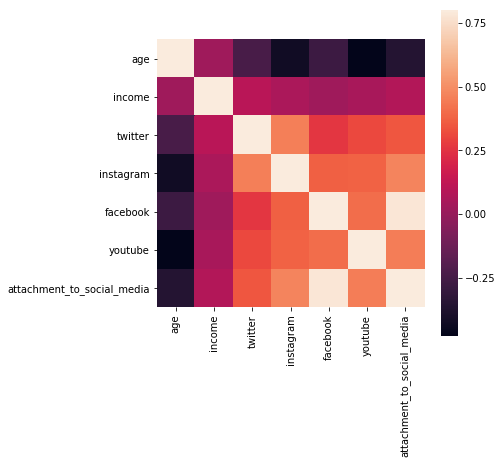

In [4]:
#--------- Feature Selection ---------------

#Check correlations
corrmat = survey.corr()
corrmat['Col'] = corrmat.index
df_corr = pd.melt(corrmat, id_vars=['Col'])
df_corr = df_corr[0:df_corr['Col'].size//2]

threshold = .50
list_colsflagged = []

list_colsflagged = df_corr.loc[(abs(df_corr['value']) > threshold) &
                               (df_corr['Col'] != df_corr['variable'])].sort_values('variable')

print('Variables with correlation greater than: ' + str(threshold))
print(list_colsflagged)


# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(6, 6))

# Draw the heatmap using seaborn.
sns.heatmap(survey.corr(), vmax=.8, square=True)
plt.show()



attachment_to_social_media ~ age+income+twitter+instagram+facebook+youtube

           Parameter        P-Value
Intercept   0.239933   2.665399e-07
age        -0.002493   5.863369e-05
income      0.014272   4.016038e-04
twitter     0.032636   5.845203e-06
instagram   0.053313   3.079869e-16
facebook    0.230177  2.219131e-308
youtube     0.032129   4.265580e-07

R-Squared: 0.6676947388289097


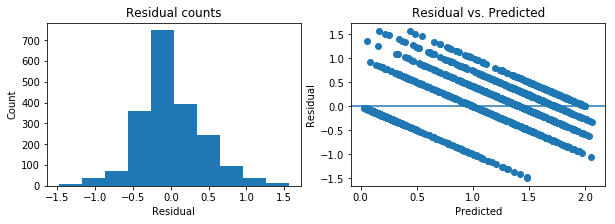

In [5]:
#survey = my_minmax_scaler(survey,0,10)

#------  Run OLS Linear Regression ---------
Train_Y = survey['attachment_to_social_media']
Train_X = survey.drop(labels='attachment_to_social_media', axis=1)



regr = my_get_feature_p_values(df=survey, feature_list = Train_X.columns, y_var = 'attachment_to_social_media' )

Predict_Y = regr.predict(Train_X)

my_explore_residuals(Predict_Y,Train_Y)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/_kernel_base.py:513: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) /

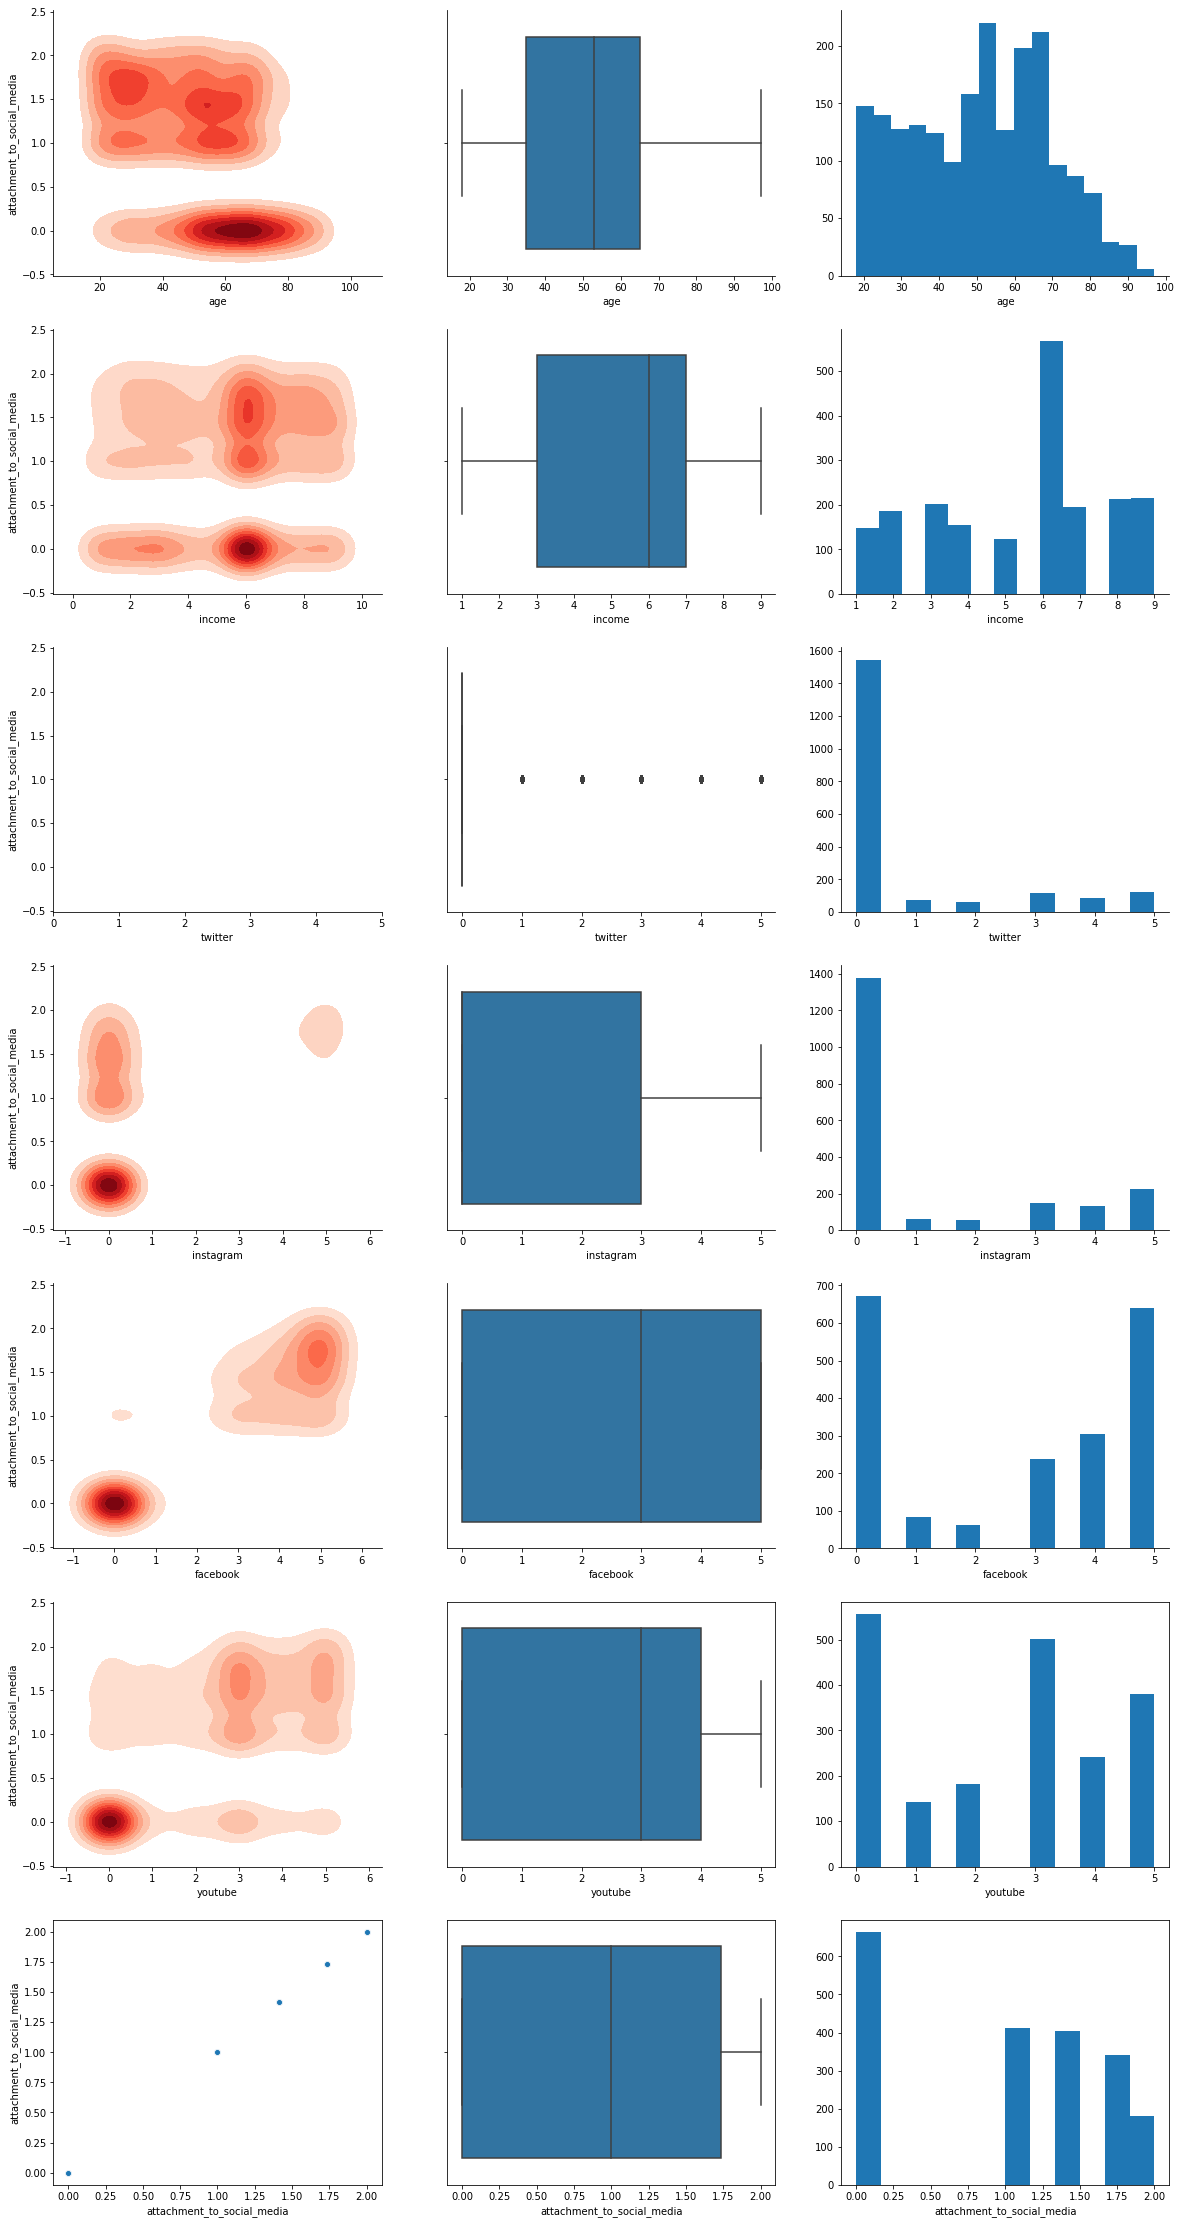

In [6]:
my_plot_loop(Train_X,Train_Y)

In [7]:
from sklearn.model_selection import cross_val_score

regr = linear_model.LinearRegression()

score = cross_val_score(regr, Train_X, Train_Y, cv=10)
print(score)
print("Model Accuracy: %.2f (+/- %.2f)" % (score.mean(), (score.std() * 2)))

[0.74253487 0.71131451 0.6649596  0.6813696  0.58085401 0.58909587
 0.65739089 0.61088594 0.61473657 0.61519009]
Model Accuracy: 0.65 (+/- 0.10)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


[0.66185607 0.68811291 0.59127097 0.64280355 0.57885572 0.64649453]
Model Accuracy: 0.63 (+/- 0.08)
KNN Regression RSquared: 0.985812224666297


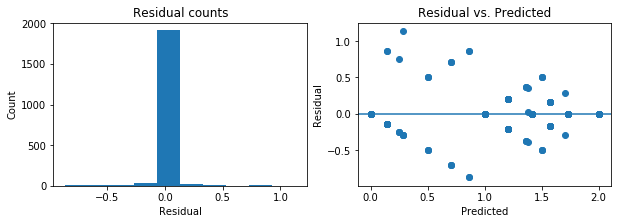

In [14]:
knn = neighbors.KNeighborsRegressor(n_neighbors=30, weights='distance')
model = knn.fit(Train_X, Train_Y)



Predict_Y = model.predict(Train_X)
      
score = cross_val_score(knn, Train_X, Train_Y, cv=6)
print(score)
print("Model Accuracy: %.2f (+/- %.2f)" % (score.mean(), (score.std() * 2)))


print('KNN Regression RSquared: ' + str(knn.score(Train_X, Train_Y)))

my_explore_residuals(Predict_Y,Train_Y)
